In [31]:

import numpy as np
import pandas as pd 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import  warnings
warnings.filterwarnings("ignore")

In [2]:
data=[[1,2],[1,4],[1,0],[4,4],[4,0]]
z=linkage(data,'ward')
dendrogram(z)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5]],
 'dcoord': [[0.0, 3.0, 3.0, 0.0],
  [0.0, 2.0, 2.0, 0.0],
  [0.0, 3.651483716701107, 3.651483716701107, 2.0],
  [3.0, 5.221749387577565, 5.221749387577565, 3.651483716701107]],
 'ivl': ['2', '4', '3', '0', '1'],
 'leaves': [2, 4, 3, 0, 1],
 'color_list': ['g', 'r', 'r', 'b']}

In [3]:
url = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')
del df.index.name
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


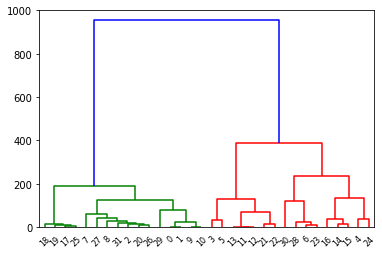

In [19]:
z=linkage(df,'ward')
dendrogram(z)
plt.show()

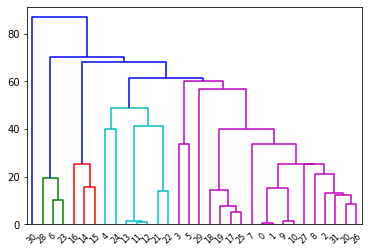

In [18]:
z=linkage(df,'single')
dendrogram(z)
plt.show()

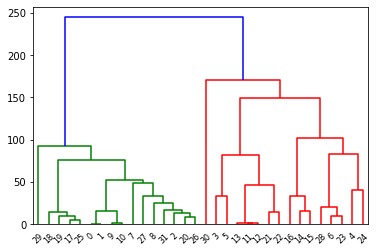

In [17]:
z=linkage(df,'average')
dendrogram(z)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

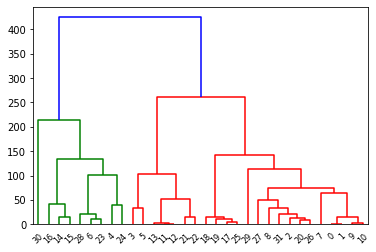

In [16]:
z=linkage(df,'complete')
dendrogram(z)
plt.show

In [8]:
df1 = pd.read_csv(r'C:\Users\gsati\Downloads\Unsupervised Learning\USL_Dataset\breast_cancer.csv')
df1.drop(['id','diagnosis'],1, inplace=True)
df1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


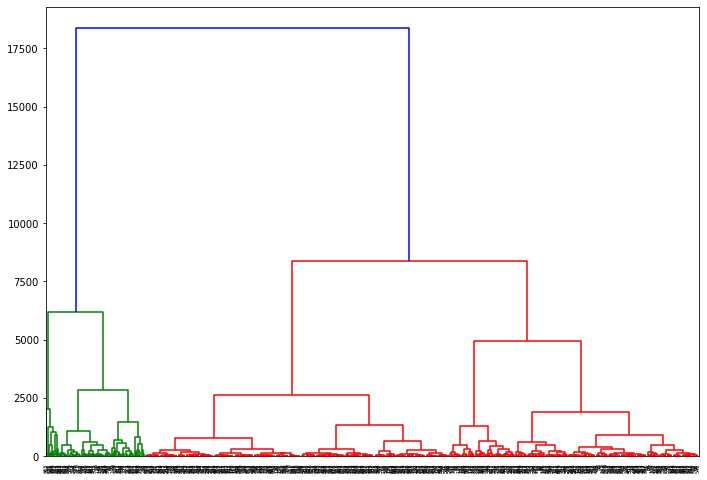

In [12]:
y=linkage(df1,'ward')
fig,ax= plt.subplots()
fig.set_size_inches(11.7, 8.27)
dendrogram(y,labels=df1.index,leaf_rotation=90)
x = np.linspace(-10,100,10)
y = 100*np.ones(10)
plt.plot(x,y,'green')
plt.show()

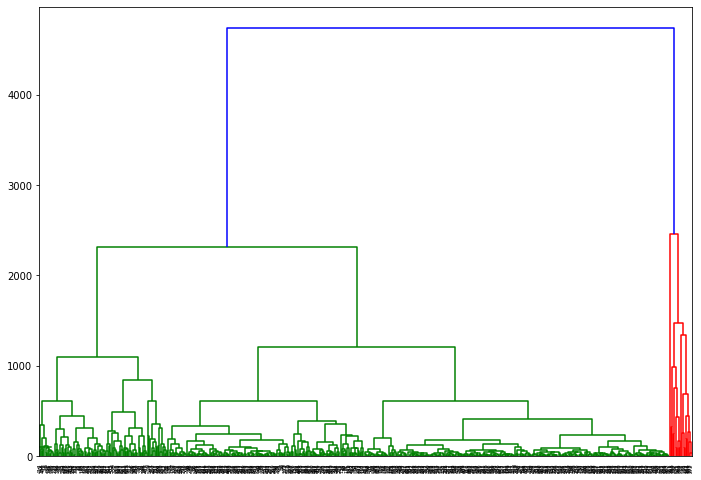

In [11]:

fig,ax= plt.subplots()
fig.set_size_inches(11.7, 8.27)
z=linkage(df1,'complete')
dendrogram(z,labels=df1.index,leaf_rotation=90)
x = np.linspace(-10,100,10)
y = 100*np.ones(10)
plt.plot(x,y,'green')
plt.show()

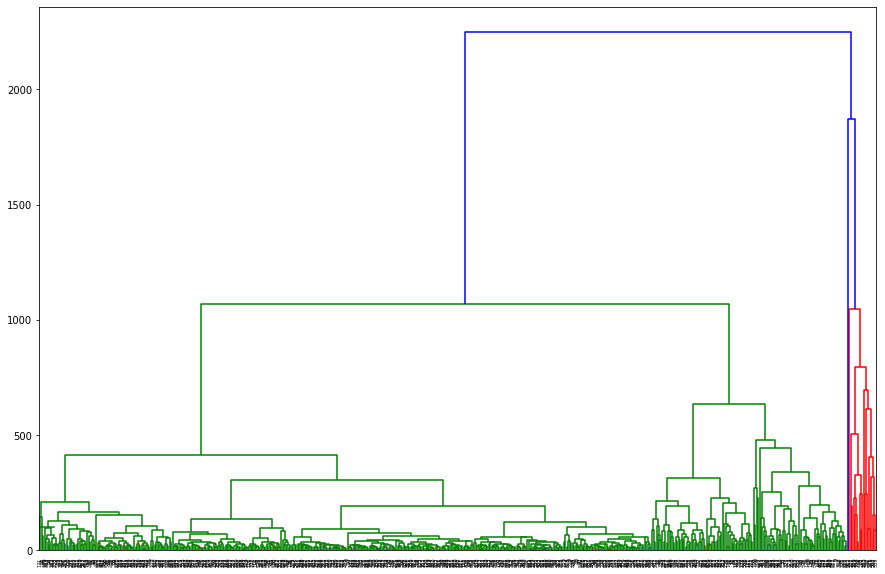

In [15]:
fig,ax= plt.subplots()
fig.set_size_inches(15,10)
z=linkage(df1,'average')
dendrogram(z,labels=df1.index,leaf_rotation=90)
x = np.linspace(-10,100,10)
y = 100*np.ones(10)
plt.plot(x,y,'green')
plt.show()

In [21]:
X = np.array([[5,3], [10,15], [15,12],[24,10],[30,30],[85,70],[71,80],[60,78],[70,55],[80,91],])

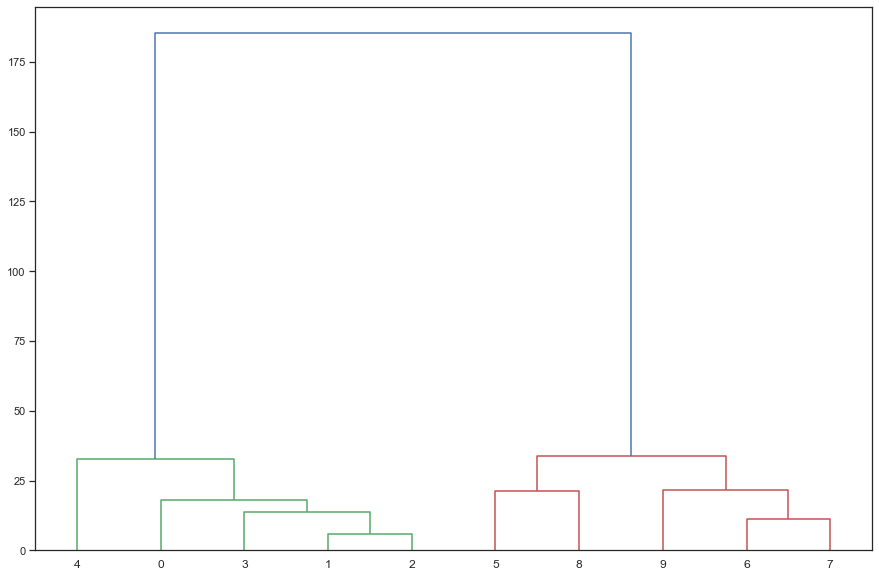

In [25]:
fig,ax= plt.subplots()
fig.set_size_inches(15,10)
z=linkage(X,'ward')
dendrogram(z)
# x = np.linspace(-10,100,10)
# y = 100*np.ones(10)
# plt.plot(x,y,'green')
plt.show()

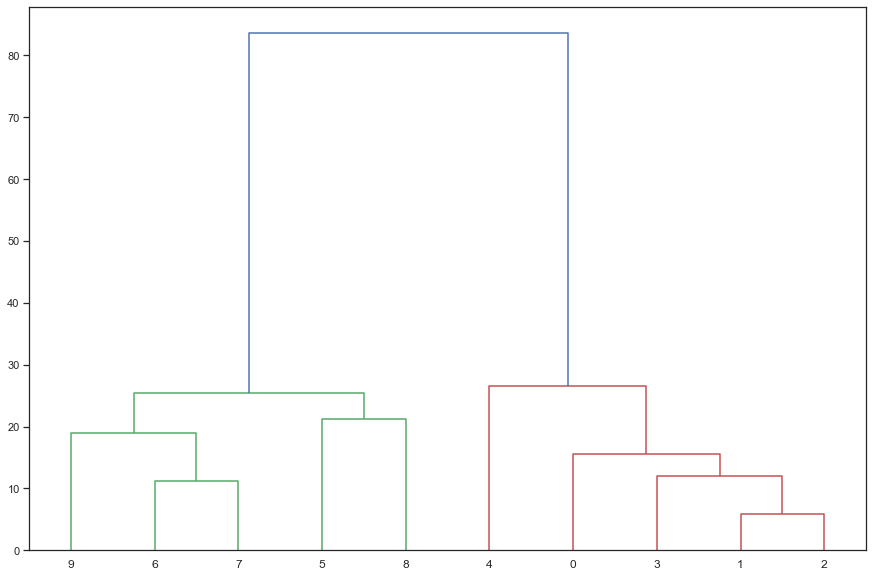

In [26]:
fig,ax= plt.subplots()
fig.set_size_inches(15,10)
z=linkage(X,'average')
dendrogram(z)
plt.show()

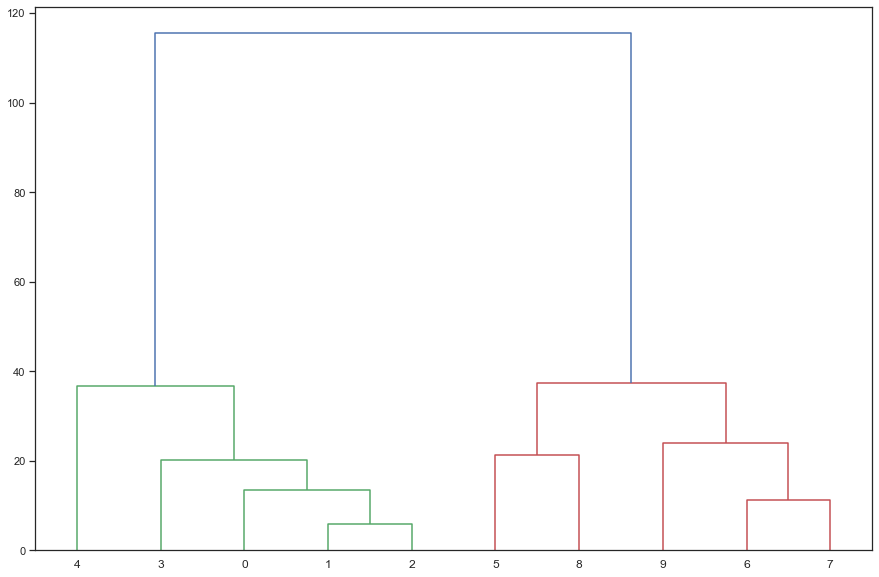

In [28]:
fig,ax= plt.subplots()
fig.set_size_inches(15,10)
z=linkage(X,'complete')
dendrogram(z)
plt.show()

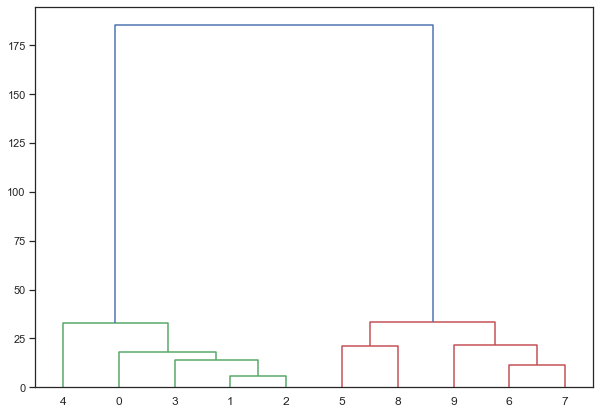

In [29]:
linked  = linkage(X, 'ward')

labelList = range(1, 11)

plt.figure(figsize=(10,7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

In [32]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

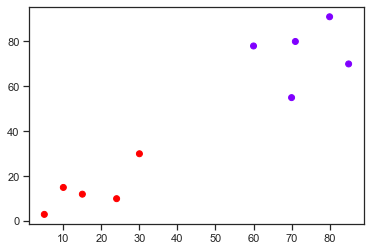

In [33]:
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')